In [1]:
import gdown
import os
import rasterio
import numpy as np
from tqdm import tqdm
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

<span style="color:turquoise;">The following code retrieves the weather data previously saved on [Google Drive](https://drive.google.com/drive/folders/1jGWb2LsRcFwGe1POccJXIeqtjEcfss_5?usp=sharing)  and downloads it locally. This process takes approximately 5 minutes per variable.</span>

In [2]:
def download_weather_data(data_url, file_name, output_dir="../../drive_downloaded_files"):
    """
    Downloads a weather data file (e.g., temperature, precipitation, humidity) from Google Drive.
    
    Parameters:
        data_url (str): The URL to download the weather data file from.
        file_name (str): The file name including the variable and year (e.g., "2m_temperature_2023.netcdf").
        output_dir (str): The directory where the downloaded file will be saved. Defaults to "../../drive_downloaded_files".
    """
    # Create the output file path using the provided file_name
    output_path = os.path.join(output_dir, file_name)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Download the file if it doesn't exist
    if not os.path.exists(output_path):
        print(f"Downloading the file from {data_url}...")
        gdown.download(data_url, output_path, quiet=False)
    else:
        print(f"The file {output_path} already exists.")


# 2m temperature (K)

This parameter is the temperature of air at 2m above the surface of land, sea or inland waters. 2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. This parameter has units of kelvin (K). Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.

In [3]:
drive_url_2m_temperature_2023 = "https://drive.google.com/uc?export=download&id=15ZCGXk4YdgF46RxIDz8z1zgqPqBCx0C8"
file_name_2m_temperature_2023 = "2m_temperature_2023.netcdf"
download_weather_data(drive_url_2m_temperature_2023, file_name_2m_temperature_2023)

The file ../../drive_downloaded_files/2m_temperature_2023.netcdf already exists.


In [4]:
ds_2m_temperature_2023 = xr.open_dataset("../../drive_downloaded_files/" + file_name_2m_temperature_2023)
ds_2m_temperature_2023

<xarray.Dataset> Size: 36GB
Dimensions:     (valid_time: 8760, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 140kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 36GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-03T05:51 GRIB to CDM+CF via cfgrib-0.9.1...

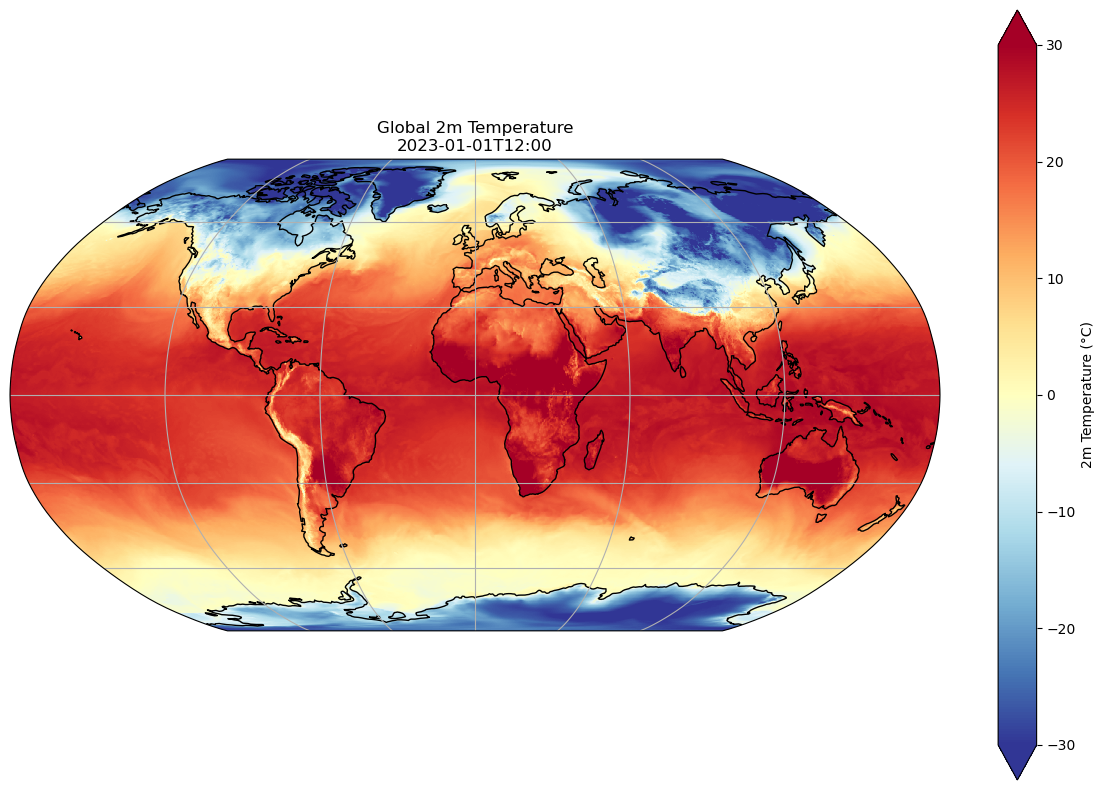

In [5]:
# Visually check the data for a specific datetime (dt).
specific_time = '2023-01-01T12:00'
temperature_one_time = ds_2m_temperature_2023['t2m'].sel(valid_time=specific_time)

# Create the map
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()

# Plot the data
# The data is in Kelvin, convert to Celsius by subtracting 273.15
im = (temperature_one_time - 273.15).plot(
    transform=ccrs.PlateCarree(),
    cmap='RdYlBu_r',  # Red-Yellow-Blue colormap, reversed
    vmin=-30,         # minimum temperature in Celsius
    vmax=30,          # maximum temperature in Celsius
    cbar_kwargs={'label': '2m Temperature (°C)'}
)

plt.title(f'Global 2m Temperature\n{specific_time}')
plt.show()

# 2m dewpoint temperature (K)
This parameter is the temperature to which the air, at 2 metres above the surface of the Earth, would have to be cooled for saturation to occur. It is a measure of the humidity of the air. Combined with temperature, it can be used to calculate the relative humidity. 2m dew point temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. This parameter has units of kelvin (K). Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.

In [6]:
drive_url_2m_dewpoint_temperature_2023 = "https://drive.google.com/uc?export=download&id=1OK8q9zxVaVvVAHORRGWaHxTszYEgrhyR"

file_name_2m_dewpoint_temperature_2023 = "2m_dewpoint_temperature_2023.netcdf"
download_weather_data(drive_url_2m_dewpoint_temperature_2023, file_name_2m_dewpoint_temperature_2023)

The file ../../drive_downloaded_files/2m_dewpoint_temperature_2023.netcdf already exists.


In [7]:
ds_2m_dewpoint_temperature_2023 = xr.open_dataset("../../drive_downloaded_files/" + file_name_2m_dewpoint_temperature_2023)
ds_2m_dewpoint_temperature_2023

<xarray.Dataset> Size: 36GB
Dimensions:     (valid_time: 8760, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 140kB ...
Data variables:
    d2m         (valid_time, latitude, longitude) float32 36GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-06T02:36 GRIB to CDM+CF via cfgrib-0.9.1...

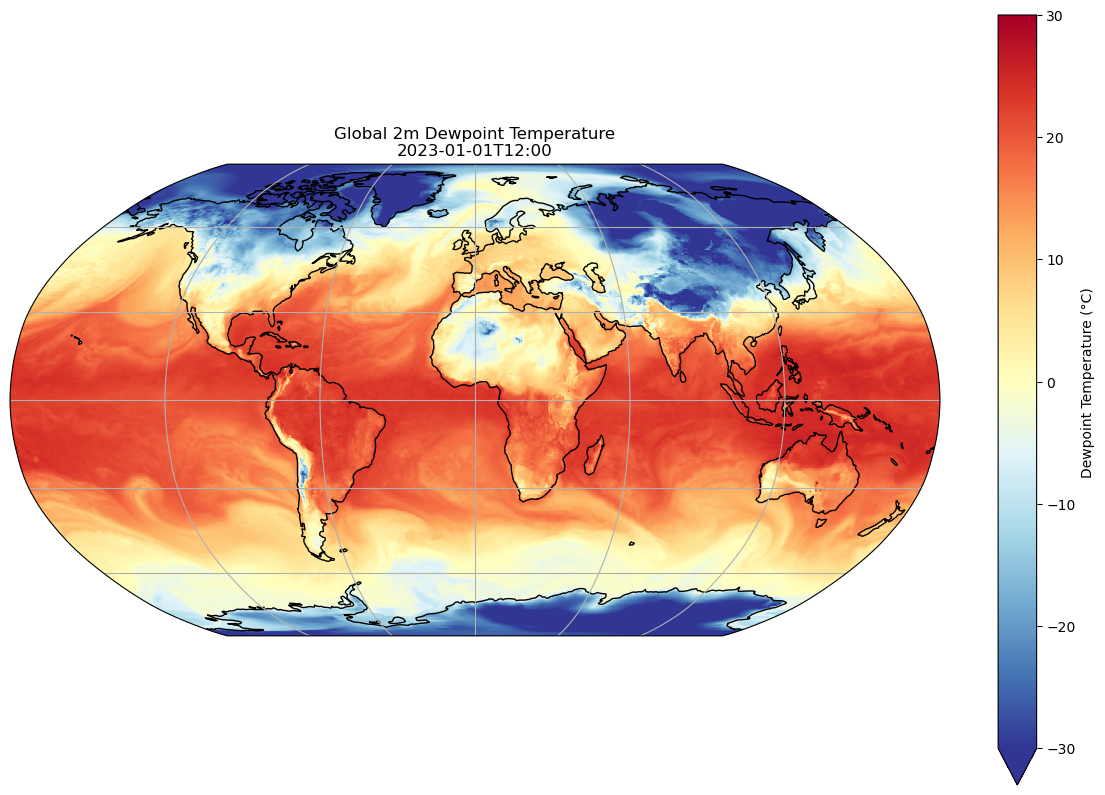

In [8]:
# Visually check the data for a specific datetime (dt).
specific_time = '2023-01-01T12:00'
dewpoint_one_time = ds_2m_dewpoint_temperature_2023['d2m'].sel(valid_time=specific_time)

# Create the map
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()

# Plot the data
# The data is in Kelvin, convert to Celsius by subtracting 273.15
im = (dewpoint_one_time - 273.15).plot(
    transform=ccrs.PlateCarree(),
    cmap='RdYlBu_r',  # Red-Yellow-Blue colormap, reversed
    vmin=-30,         # minimum temperature in Celsius
    vmax=30,          # maximum temperature in Celsius
    cbar_kwargs={'label': 'Dewpoint Temperature (°C)'}
)

plt.title(f'Global 2m Dewpoint Temperature\n{specific_time}')
plt.show()

# Total precipitation (m)
This parameter is the accumulated liquid and frozen water, comprising rain and snow, that falls to the Earth's surface. It is the sum of large-scale precipitation and convective precipitation. Large-scale precipitation is generated by the cloud scheme in the ECMWF Integrated Forecasting System (IFS). The cloud scheme represents the formation and dissipation of clouds and large-scale precipitation due to changes in atmospheric quantities (such as pressure, temperature and moisture) predicted directly by the IFS at spatial scales of the grid box or larger. Convective precipitation is generated by the convection scheme in the IFS, which represents convection at spatial scales smaller than the grid box. This parameter does not include fog, dew or the precipitation that evaporates in the atmosphere before it lands at the surface of the Earth. This parameter is accumulated over a particular time period which depends on the data extracted. For the reanalysis, the accumulation period is over the 1 hour ending at the validity date and time. For the ensemble members, ensemble mean and ensemble spread, the accumulation period is over the 3 hours ending at the validity date and time. The units of this parameter are depth in metres of water equivalent. It is the depth the water would have if it were spread evenly over the grid box. Care should be taken when comparing model parameters with observations, because observations are often local to a particular point in space and time, rather than representing averages over a model grid box.

In [9]:
drive_url_total_precipitation_2023 = "https://drive.google.com/uc?export=download&id=1HtqZBwzgGxRtP47MNVGzMlhI68mX3vaR"
file_name_total_precipitation_2023 = "total_precipitation_2023.netcdf"
download_weather_data(drive_url_total_precipitation_2023, file_name_total_precipitation_2023)

The file ../../drive_downloaded_files/total_precipitation_2023.netcdf already exists.


In [10]:
ds_total_precipitation_2023 = xr.open_dataset("../../drive_downloaded_files/" + file_name_total_precipitation_2023)
ds_total_precipitation_2023

<xarray.Dataset> Size: 36GB
Dimensions:     (valid_time: 8760, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 140kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 36GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-25T14:41 GRIB to CDM+CF via cfgrib-0.9.1...

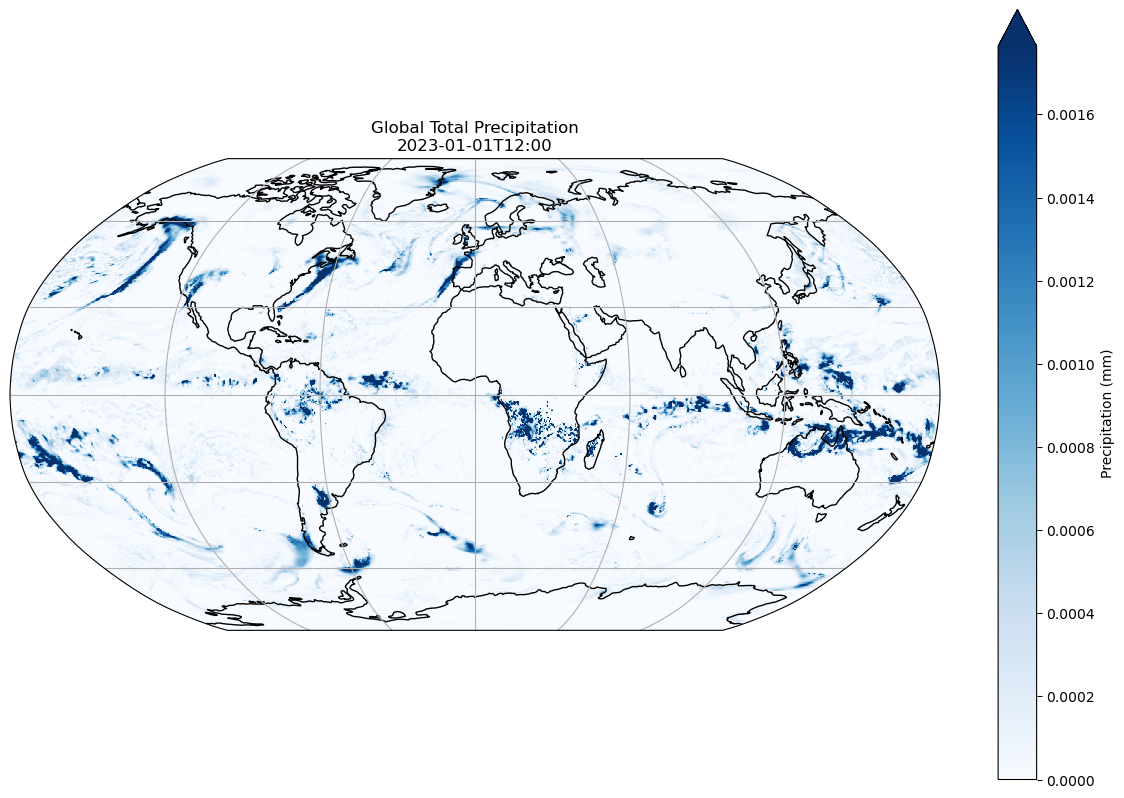

In [11]:
# Visually check the data for a specific datetime (dt).
specific_time = '2023-01-01T12:00'
precipitation_one_time = ds_total_precipitation_2023['tp'].sel(valid_time=specific_time)

# Create the map
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()

# Plot the data
# Convert from m to mm (multiply by 1000)
im = precipitation_one_time.plot(
    transform=ccrs.PlateCarree(),
    cmap='Blues',
    vmin=0,
    vmax=np.percentile(precipitation_one_time, 99),  # use 99th percentile for better visualization
    cbar_kwargs={'label': 'Precipitation (mm)'}
)

plt.title(f'Global Total Precipitation\n{specific_time}')
plt.show()